In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral


In [3]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_modelo = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_final_balanceado.csv')

In [4]:
df_modelo.head()

,id_familia,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,...,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,105,69,-1.0,2,-1.0,2,4.0,-1.0,2.0,1.0,...,4.0,5.0,1.0,2.0,2.0,0.0,1,2518.0,493,2
1,114,59,1.0,2,2.0,1,4.0,-1.0,1.0,4.0,...,3.0,5.0,1.0,2.0,2.0,0.0,1,224.0,224,2
2,135,56,-1.0,2,-1.0,2,4.0,-1.0,2.0,1.0,...,5.0,5.0,1.0,2.0,2.0,0.0,3,203.0,203,2
3,208,67,-1.0,1,-1.0,2,5.0,-1.0,2.0,1.0,...,6.0,5.0,1.0,2.0,2.0,0.0,5,1650.0,377,2
4,217,42,1.0,2,2.0,2,8.0,-1.0,1.0,4.0,...,6.0,5.0,1.0,2.0,2.0,0.0,4,194.0,194,0


In [5]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96791 entries, 0 to 96790
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_familia                       96791 non-null  int64  
 1   rf_idade                         96791 non-null  int64  
 2   rf_trab_principal                96791 non-null  float64
 3   rf_com_deficiencia               96791 non-null  int64  
 4   rf_trab_agricultura              96791 non-null  float64
 5   rf_sexo                          96791 non-null  int64  
 6   rf_curso_frequentou              96791 non-null  float64
 7   rf_curso_frequenta               96791 non-null  float64
 8   rf_trabalhou_semana              96791 non-null  float64
 9   rf_cor_raca                      96791 non-null  float64
 10  rf_concluiu_curso                96791 non-null  float64
 11  pct_extrativista                 96791 non-null  float64
 12  pct_conta_propria 

In [6]:
df_modelo['classe_renda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 96791 entries, 0 to 96790
Series name: classe_renda
Non-Null Count  Dtype
--------------  -----
96791 non-null  int64
dtypes: int64(1)
memory usage: 756.3 KB


In [7]:
# Alterar classe_renda para tipo int
df_modelo['classe_renda'] = df_modelo['classe_renda'].astype('int64')

# Verificar o tipo da coluna após a conversão
print(df_modelo['classe_renda'].dtype)


int64


In [8]:
df_modelo.columns

Index(['id_familia', 'rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_ilumina

## Identificando as features com grande correlação

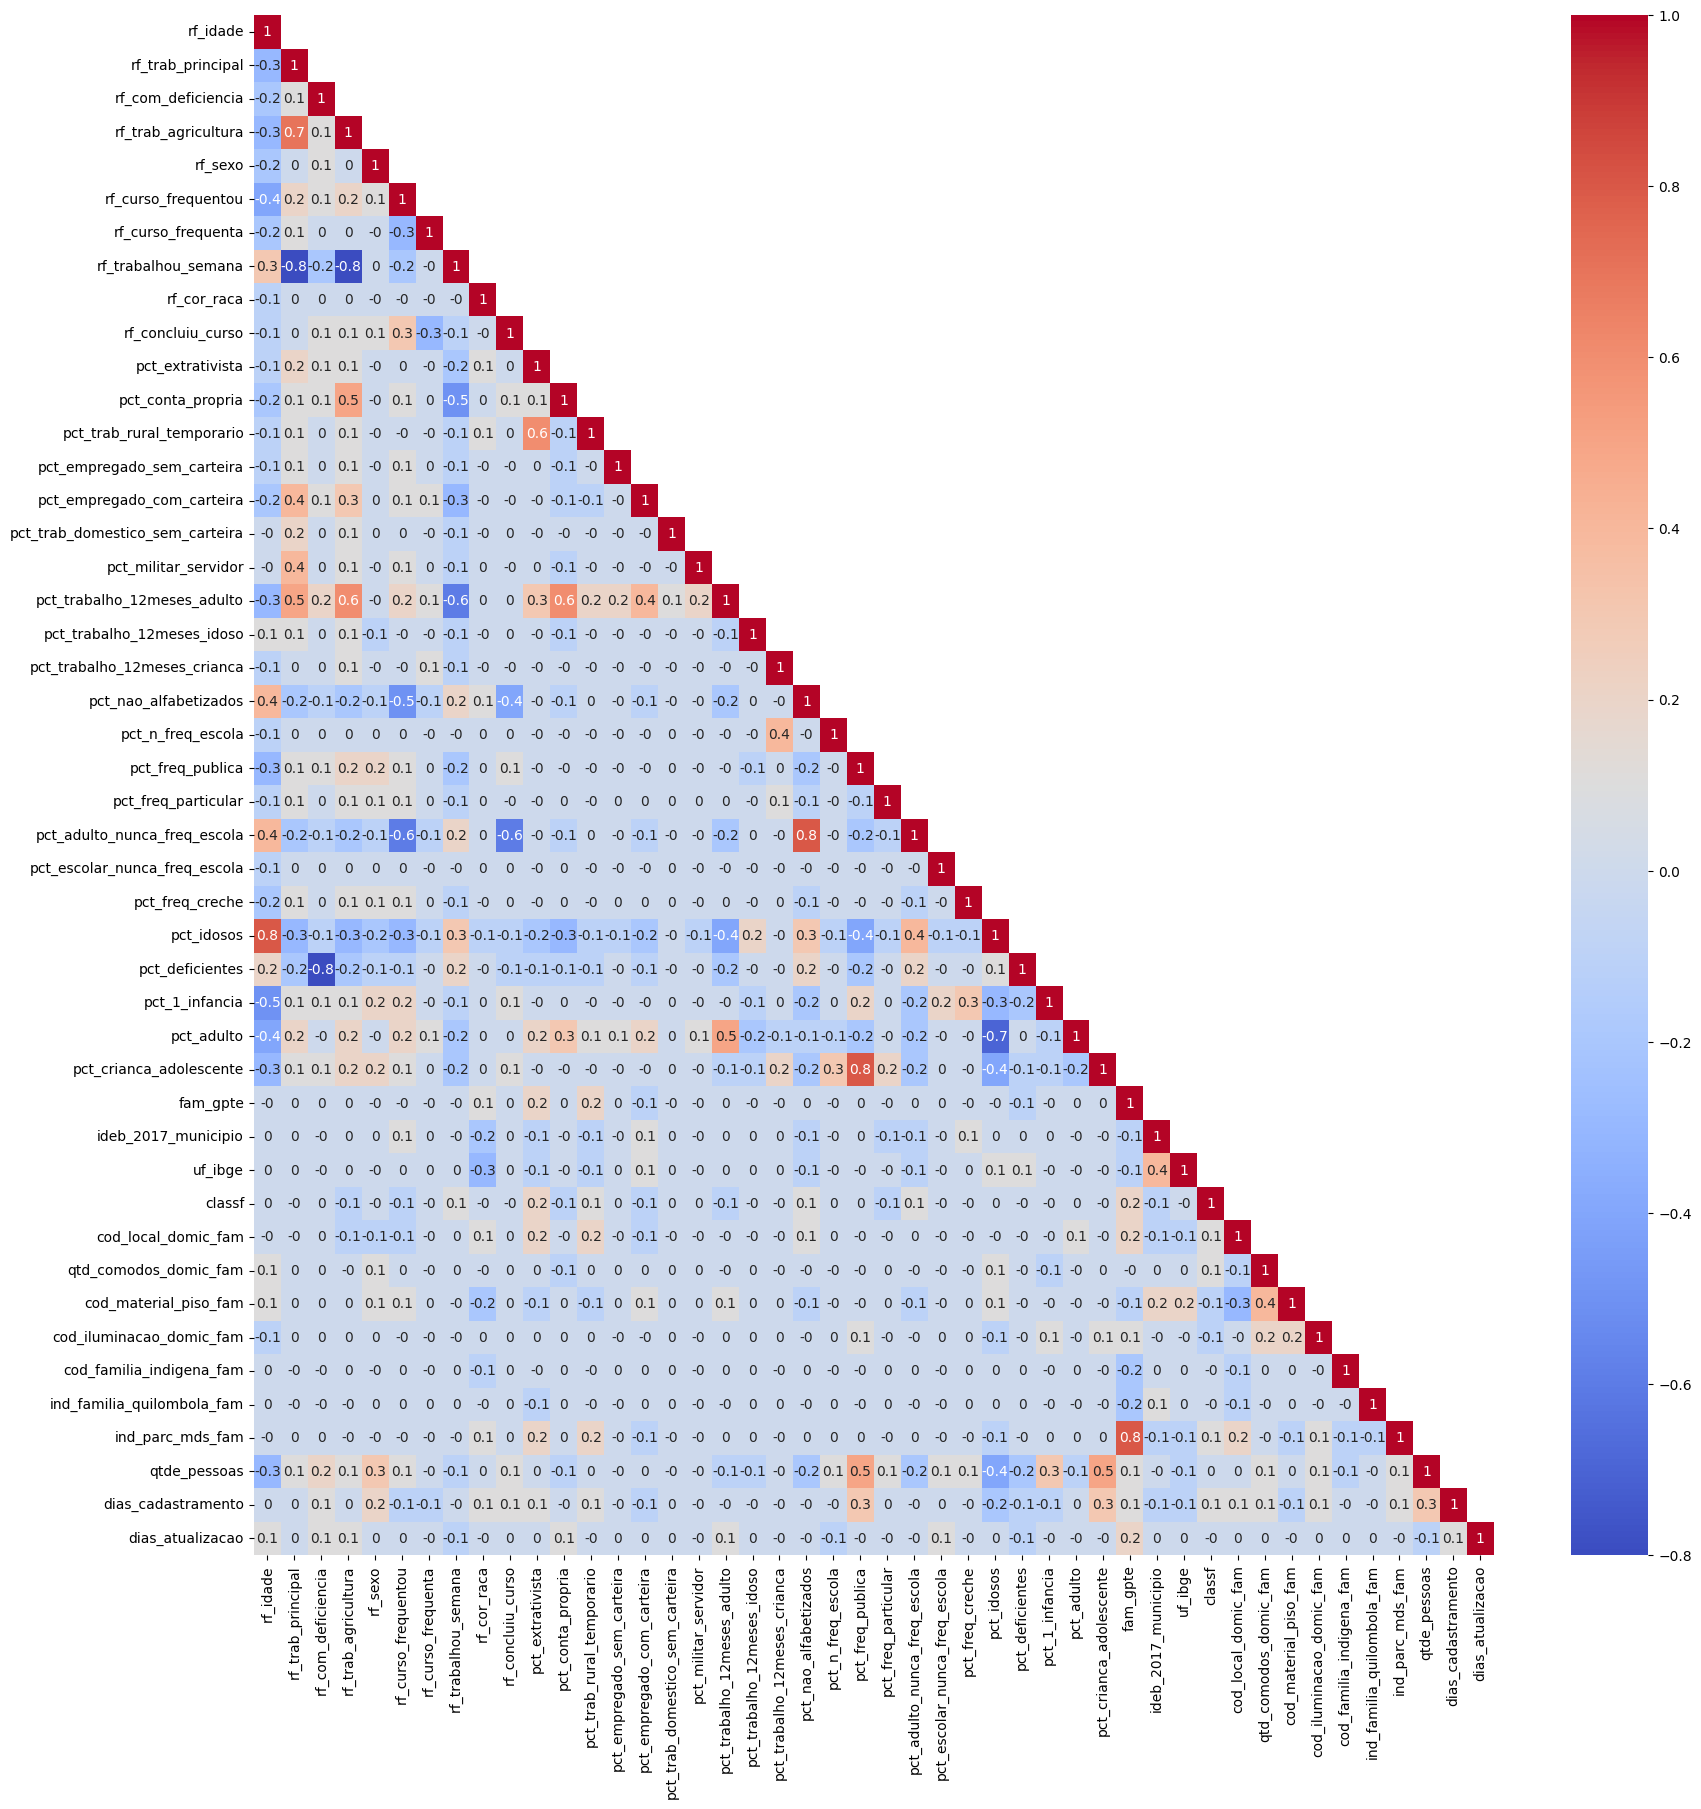

In [9]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_modelo[['rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [10]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.75
corr_strong = corr_matrix[abs(corr_matrix) > 0.75]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.75:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre pct_idosos e rf_idade: 0.7624245566692243
Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.8128946407705202
Correlação forte entre pct_crianca_adolescente e pct_freq_publica: 0.7986127655291612
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.8128946407705202
Correlação forte entre rf_idade e pct_idosos: 0.7624245566692243
Correlação forte entre pct_freq_publica e pct_crianca_adolescente: 0.7986127655291612
Correlação forte entre ind_parc_mds_fam e fam_gpte: 0.7790640180496603
Correlação forte entre fam_gpte e ind_parc_mds_fam: 0.7790640180496603


In [11]:
#Retirando features com correlação > 0.79
df_modelo = df_modelo.drop(columns=['pct_freq_publica','pct_adulto_nunca_freq_escola', 'ind_parc_mds_fam', 'rf_idade'])
                                               
df_modelo.head()

,id_familia,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,...,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,105,-1.0,2,-1.0,2,4.0,-1.0,2.0,1.0,1.0,...,1.0,4.0,5.0,1.0,2.0,2.0,1,2518.0,493,2
1,114,1.0,2,2.0,1,4.0,-1.0,1.0,4.0,1.0,...,1.0,3.0,5.0,1.0,2.0,2.0,1,224.0,224,2
2,135,-1.0,2,-1.0,2,4.0,-1.0,2.0,1.0,2.0,...,1.0,5.0,5.0,1.0,2.0,2.0,3,203.0,203,2
3,208,-1.0,1,-1.0,2,5.0,-1.0,2.0,1.0,2.0,...,1.0,6.0,5.0,1.0,2.0,2.0,5,1650.0,377,2
4,217,1.0,2,2.0,2,8.0,-1.0,1.0,4.0,1.0,...,1.0,6.0,5.0,1.0,2.0,2.0,4,194.0,194,0


In [12]:
df_modelo.columns

Index(['id_familia', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilomb

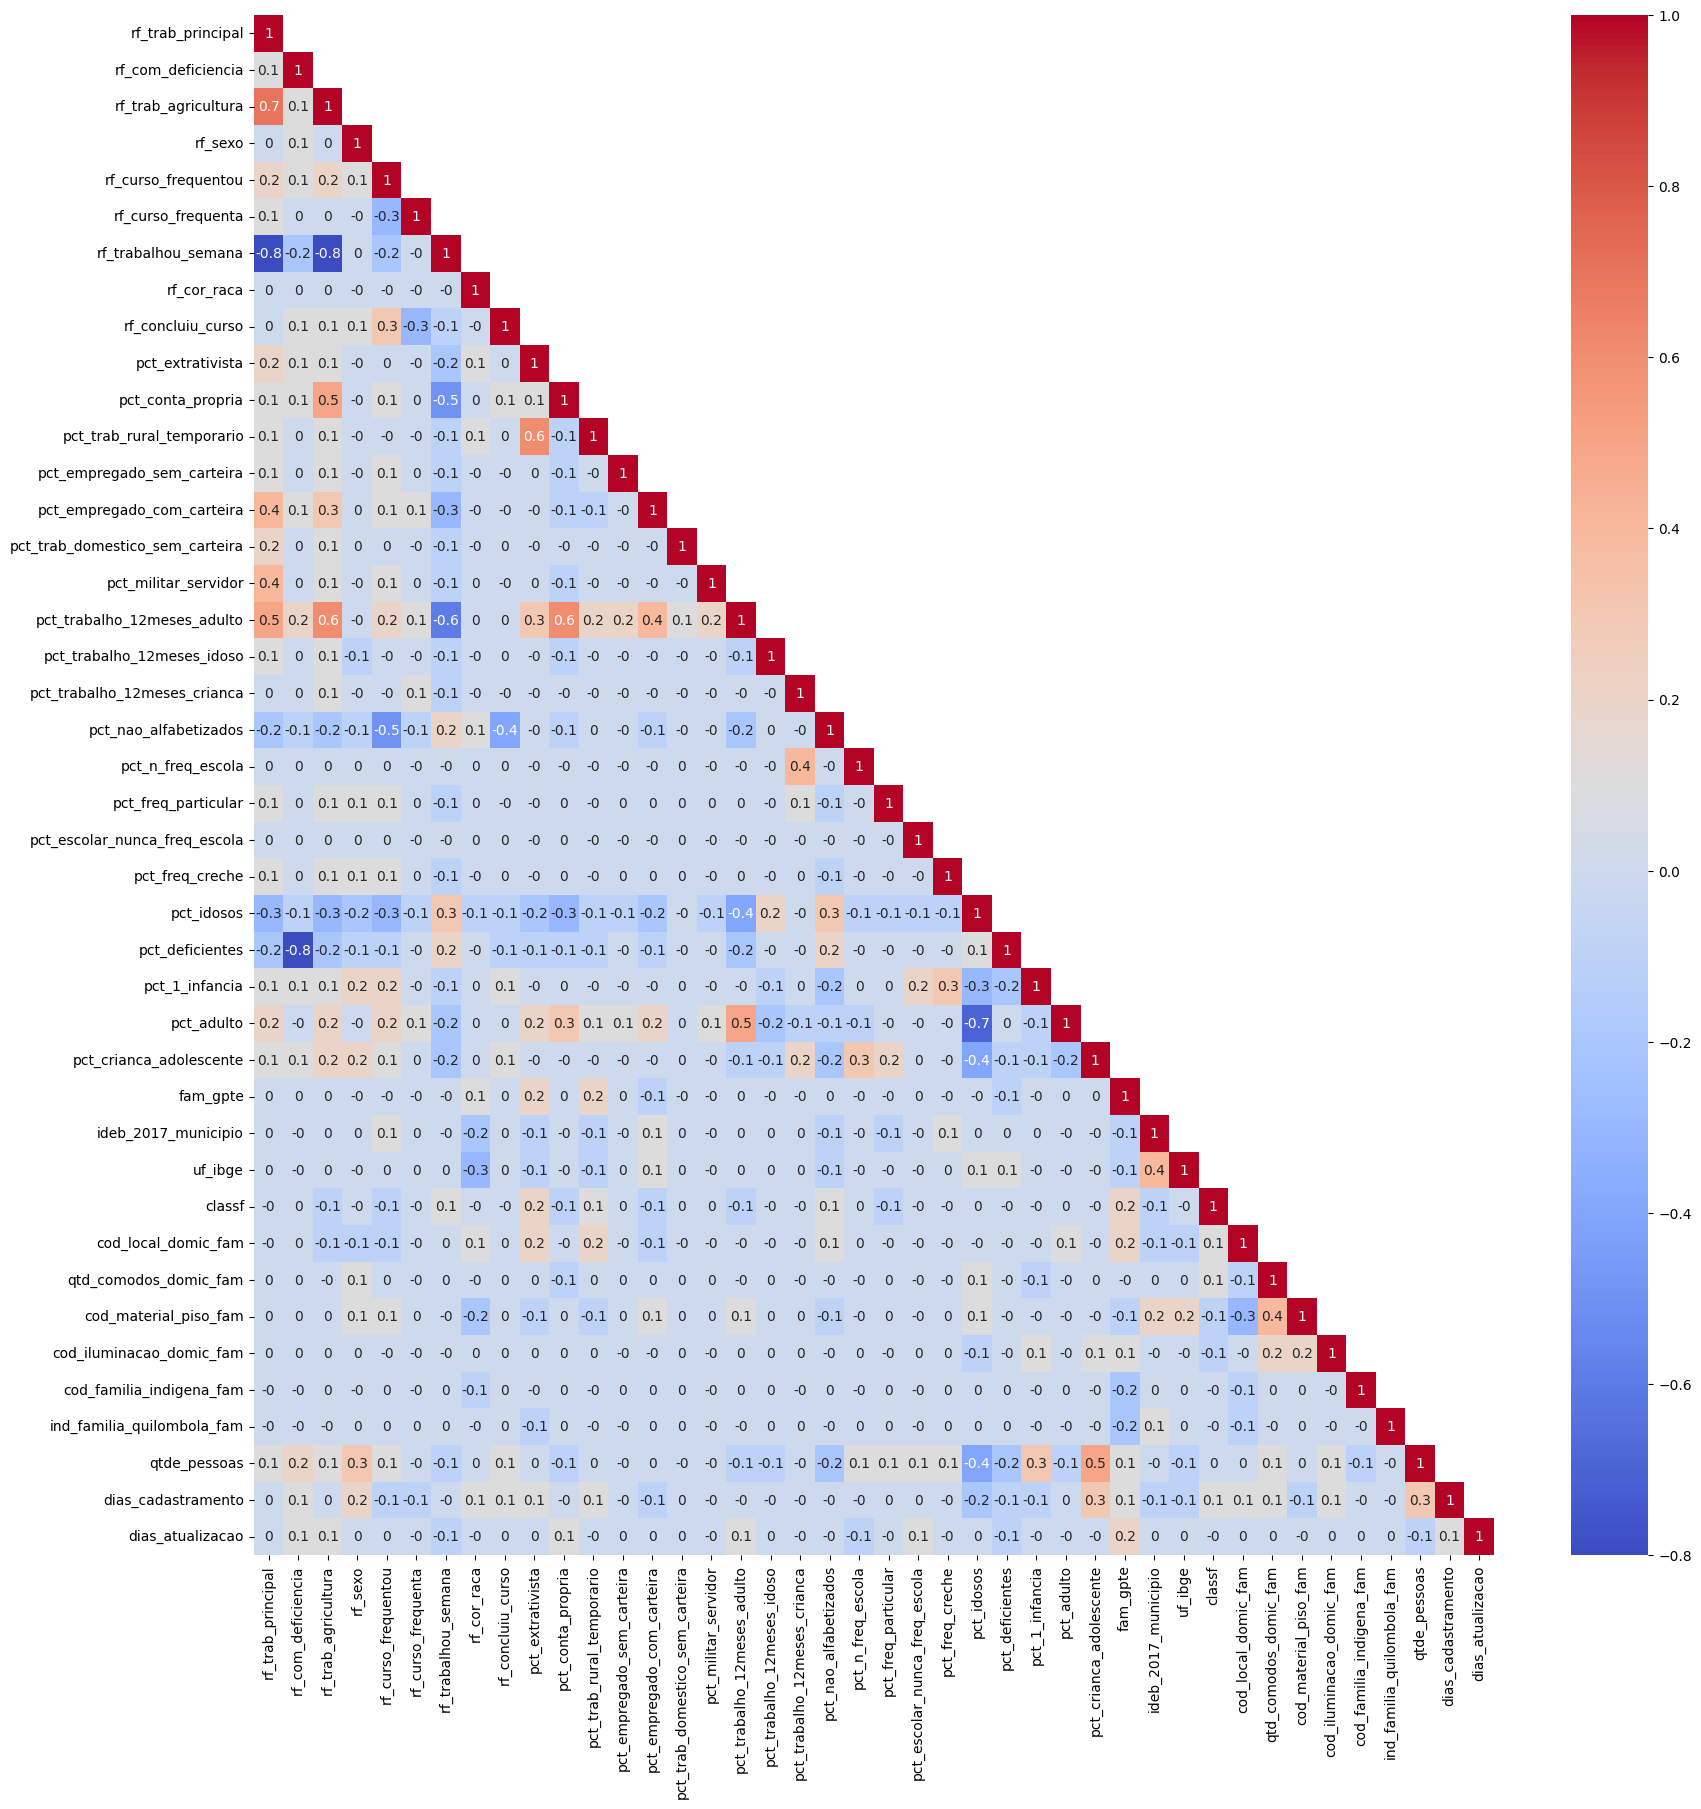

In [13]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_modelo[['rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [14]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.75
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81


In [15]:
#Retirando features com correlação > 0.75
df_modelo = df_modelo.drop(columns=['rf_com_deficiencia', 'rf_trab_agricultura', 'rf_trab_principal'])
                                               
df_modelo.head()

,id_familia,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,...,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda
0,105,2,4.0,-1.0,2.0,1.0,1.0,0.0,0.00,0.0,...,1.0,4.0,5.0,1.0,2.0,2.0,1,2518.0,493,2
1,114,1,4.0,-1.0,1.0,4.0,1.0,0.0,1.00,0.0,...,1.0,3.0,5.0,1.0,2.0,2.0,1,224.0,224,2
2,135,2,4.0,-1.0,2.0,1.0,2.0,0.0,0.00,0.0,...,1.0,5.0,5.0,1.0,2.0,2.0,3,203.0,203,2
3,208,2,5.0,-1.0,2.0,1.0,2.0,0.0,0.00,0.0,...,1.0,6.0,5.0,1.0,2.0,2.0,5,1650.0,377,2
4,217,2,8.0,-1.0,1.0,4.0,1.0,0.0,0.25,0.0,...,1.0,6.0,5.0,1.0,2.0,2.0,4,194.0,194,0


In [16]:
df_modelo.columns

Index(['id_familia', 'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao'

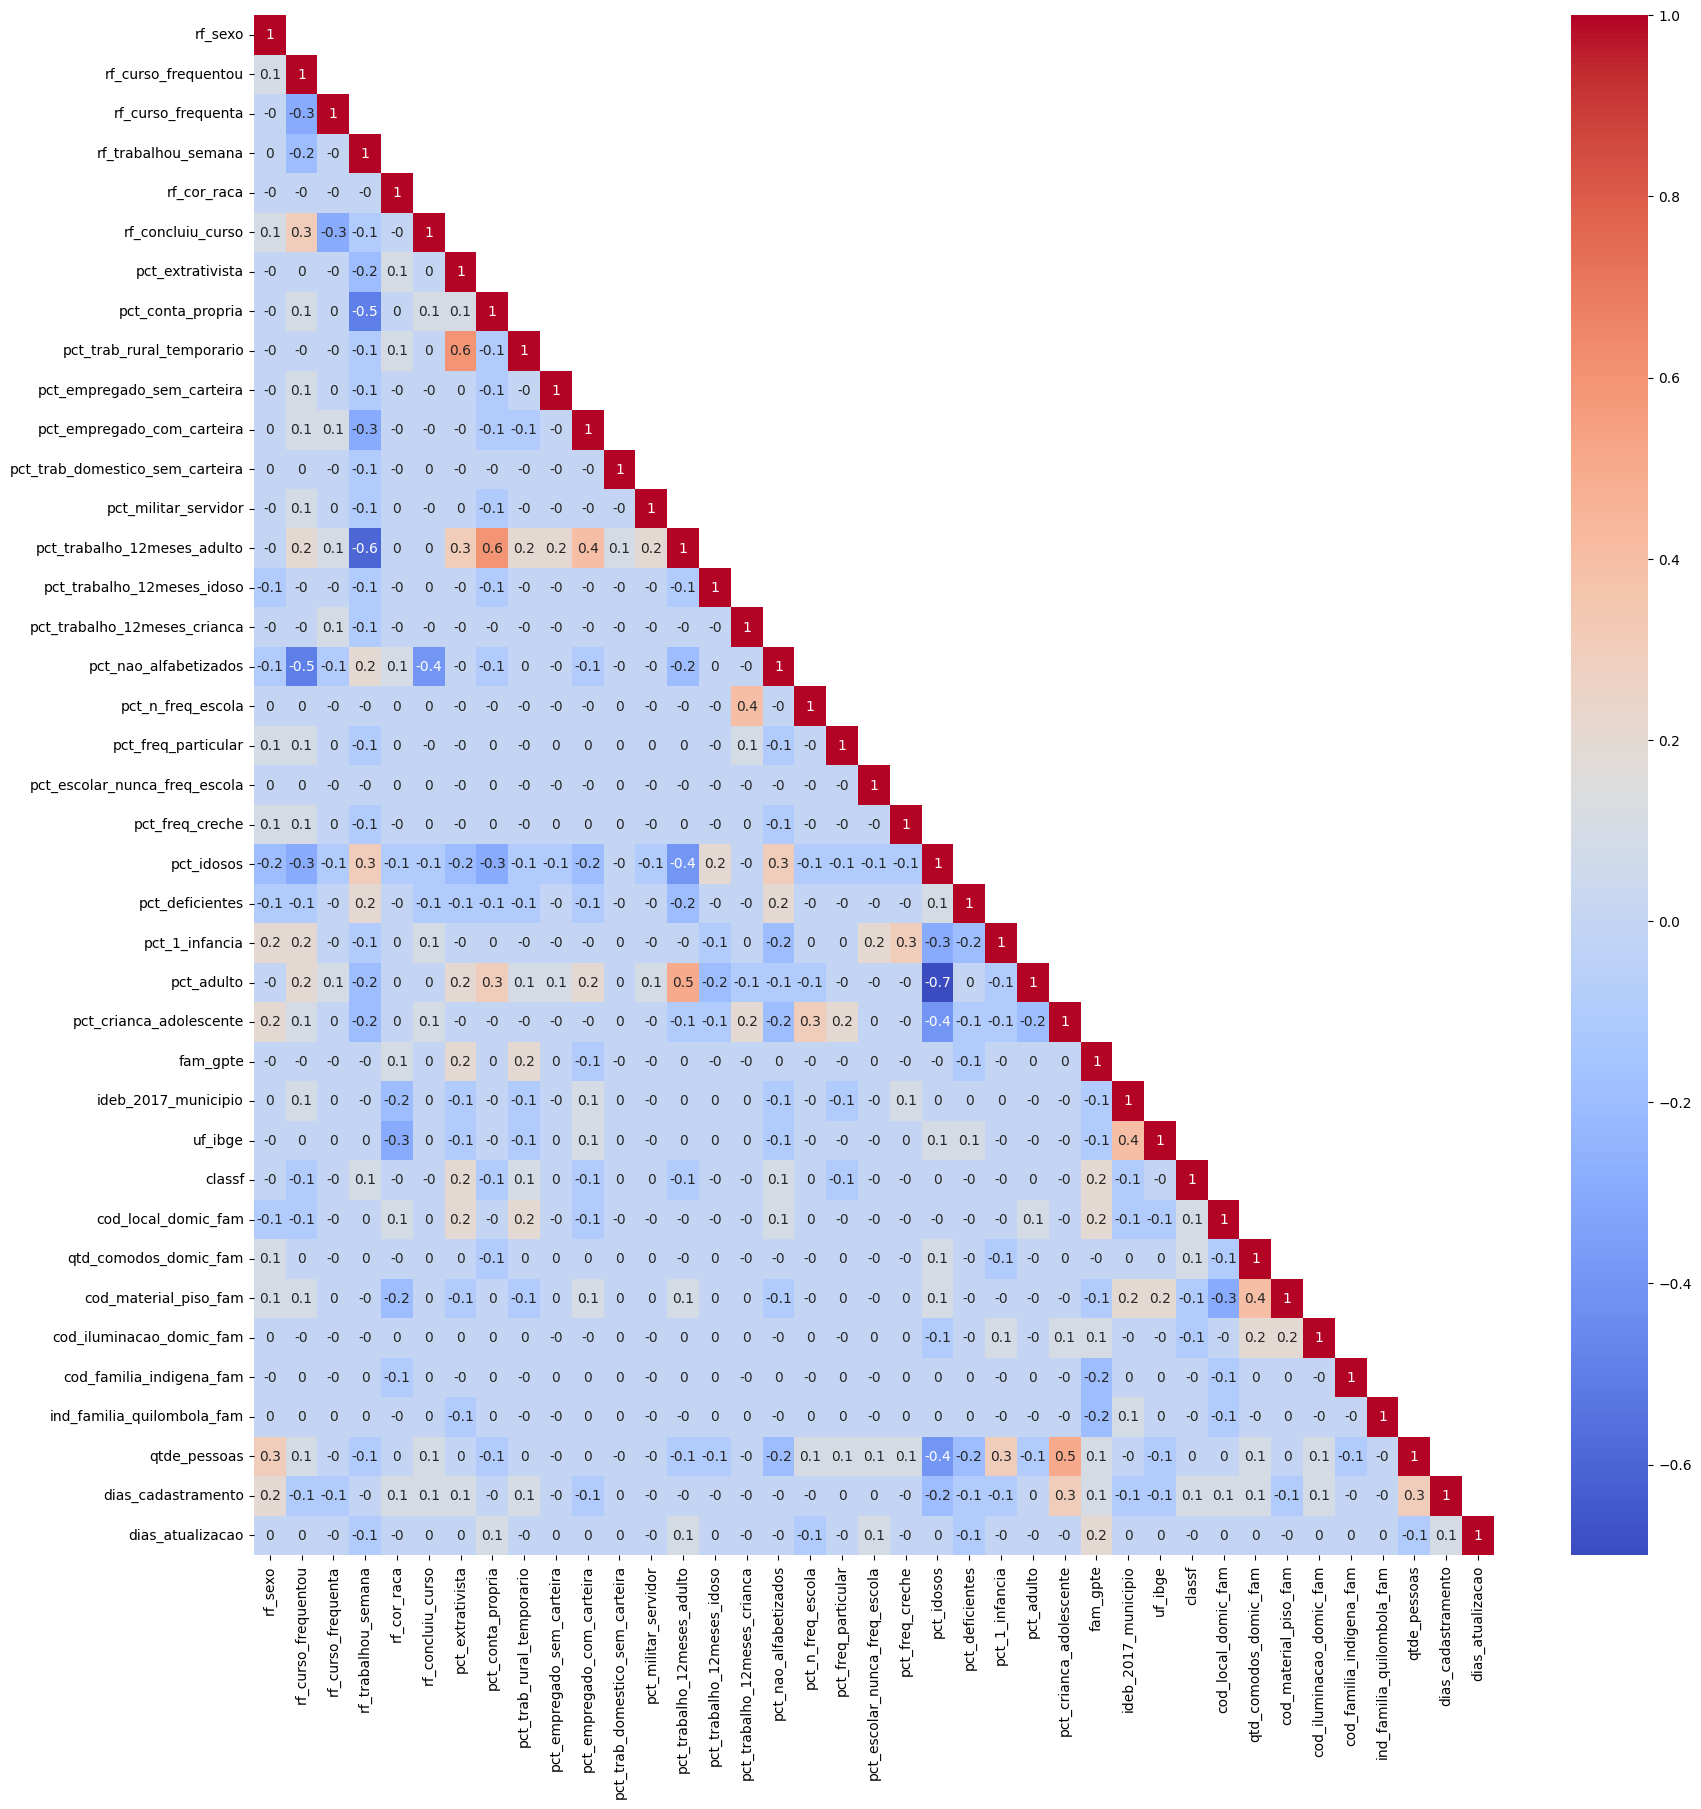

In [17]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_modelo[['rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio', 'uf_ibge',
       'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [18]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")


Não tem correlações altas acima do limite estabelecido.


In [19]:
df_modelo.shape

(96791, 41)

## Criando uma função de processamento OneHotEncoder

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda', encoder=None):
    # Definir colunas categóricas e numéricas
    binary_cols = ['cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte']  
    multiclass_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam','rf_curso_frequentou','rf_curso_frequenta',
                      'rf_cor_raca', 'rf_concluiu_curso'] 
    numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 
    percentage_cols = ['pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos','pct_deficientes',
       'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente']  
    
        
                         
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder, considerando os valores -1 como uma categoria válida
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df




In [21]:
# Chamando a função
df_modelo = preprocess_data(df_modelo)
df_modelo.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,105,4.0,1,2518.0,493,5.4,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,114,3.0,1,224.0,224,5.6,0.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
2,135,5.0,3,203.0,203,5.6,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,208,6.0,5,1650.0,377,5.6,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,217,6.0,4,194.0,194,5.4,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [22]:
df_modelo.shape

(96791, 108)

## Criando uma função de normalização das colunas quantitativas

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o StandardScaler para normalização
    scaler = StandardScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso do script
numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio']


In [24]:
# Chamando a função
df_modelo = normalize_numerical_columns(df_modelo, numerical_cols)
df_modelo.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,105,-0.172835,-1.081453,0.155193,0.199272,-0.116065,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,114,-0.743239,-1.081453,-1.000676,-0.603429,0.092777,0.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
2,135,0.397570,0.396923,-1.011257,-0.666093,0.092777,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,208,0.967975,1.875299,-0.282163,-0.146874,0.092777,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,217,0.967975,1.136111,-1.015792,-0.692949,-0.116065,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [25]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [26]:
# Exibir todas as colunas do DataFrame final
print(df_modelo.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_3

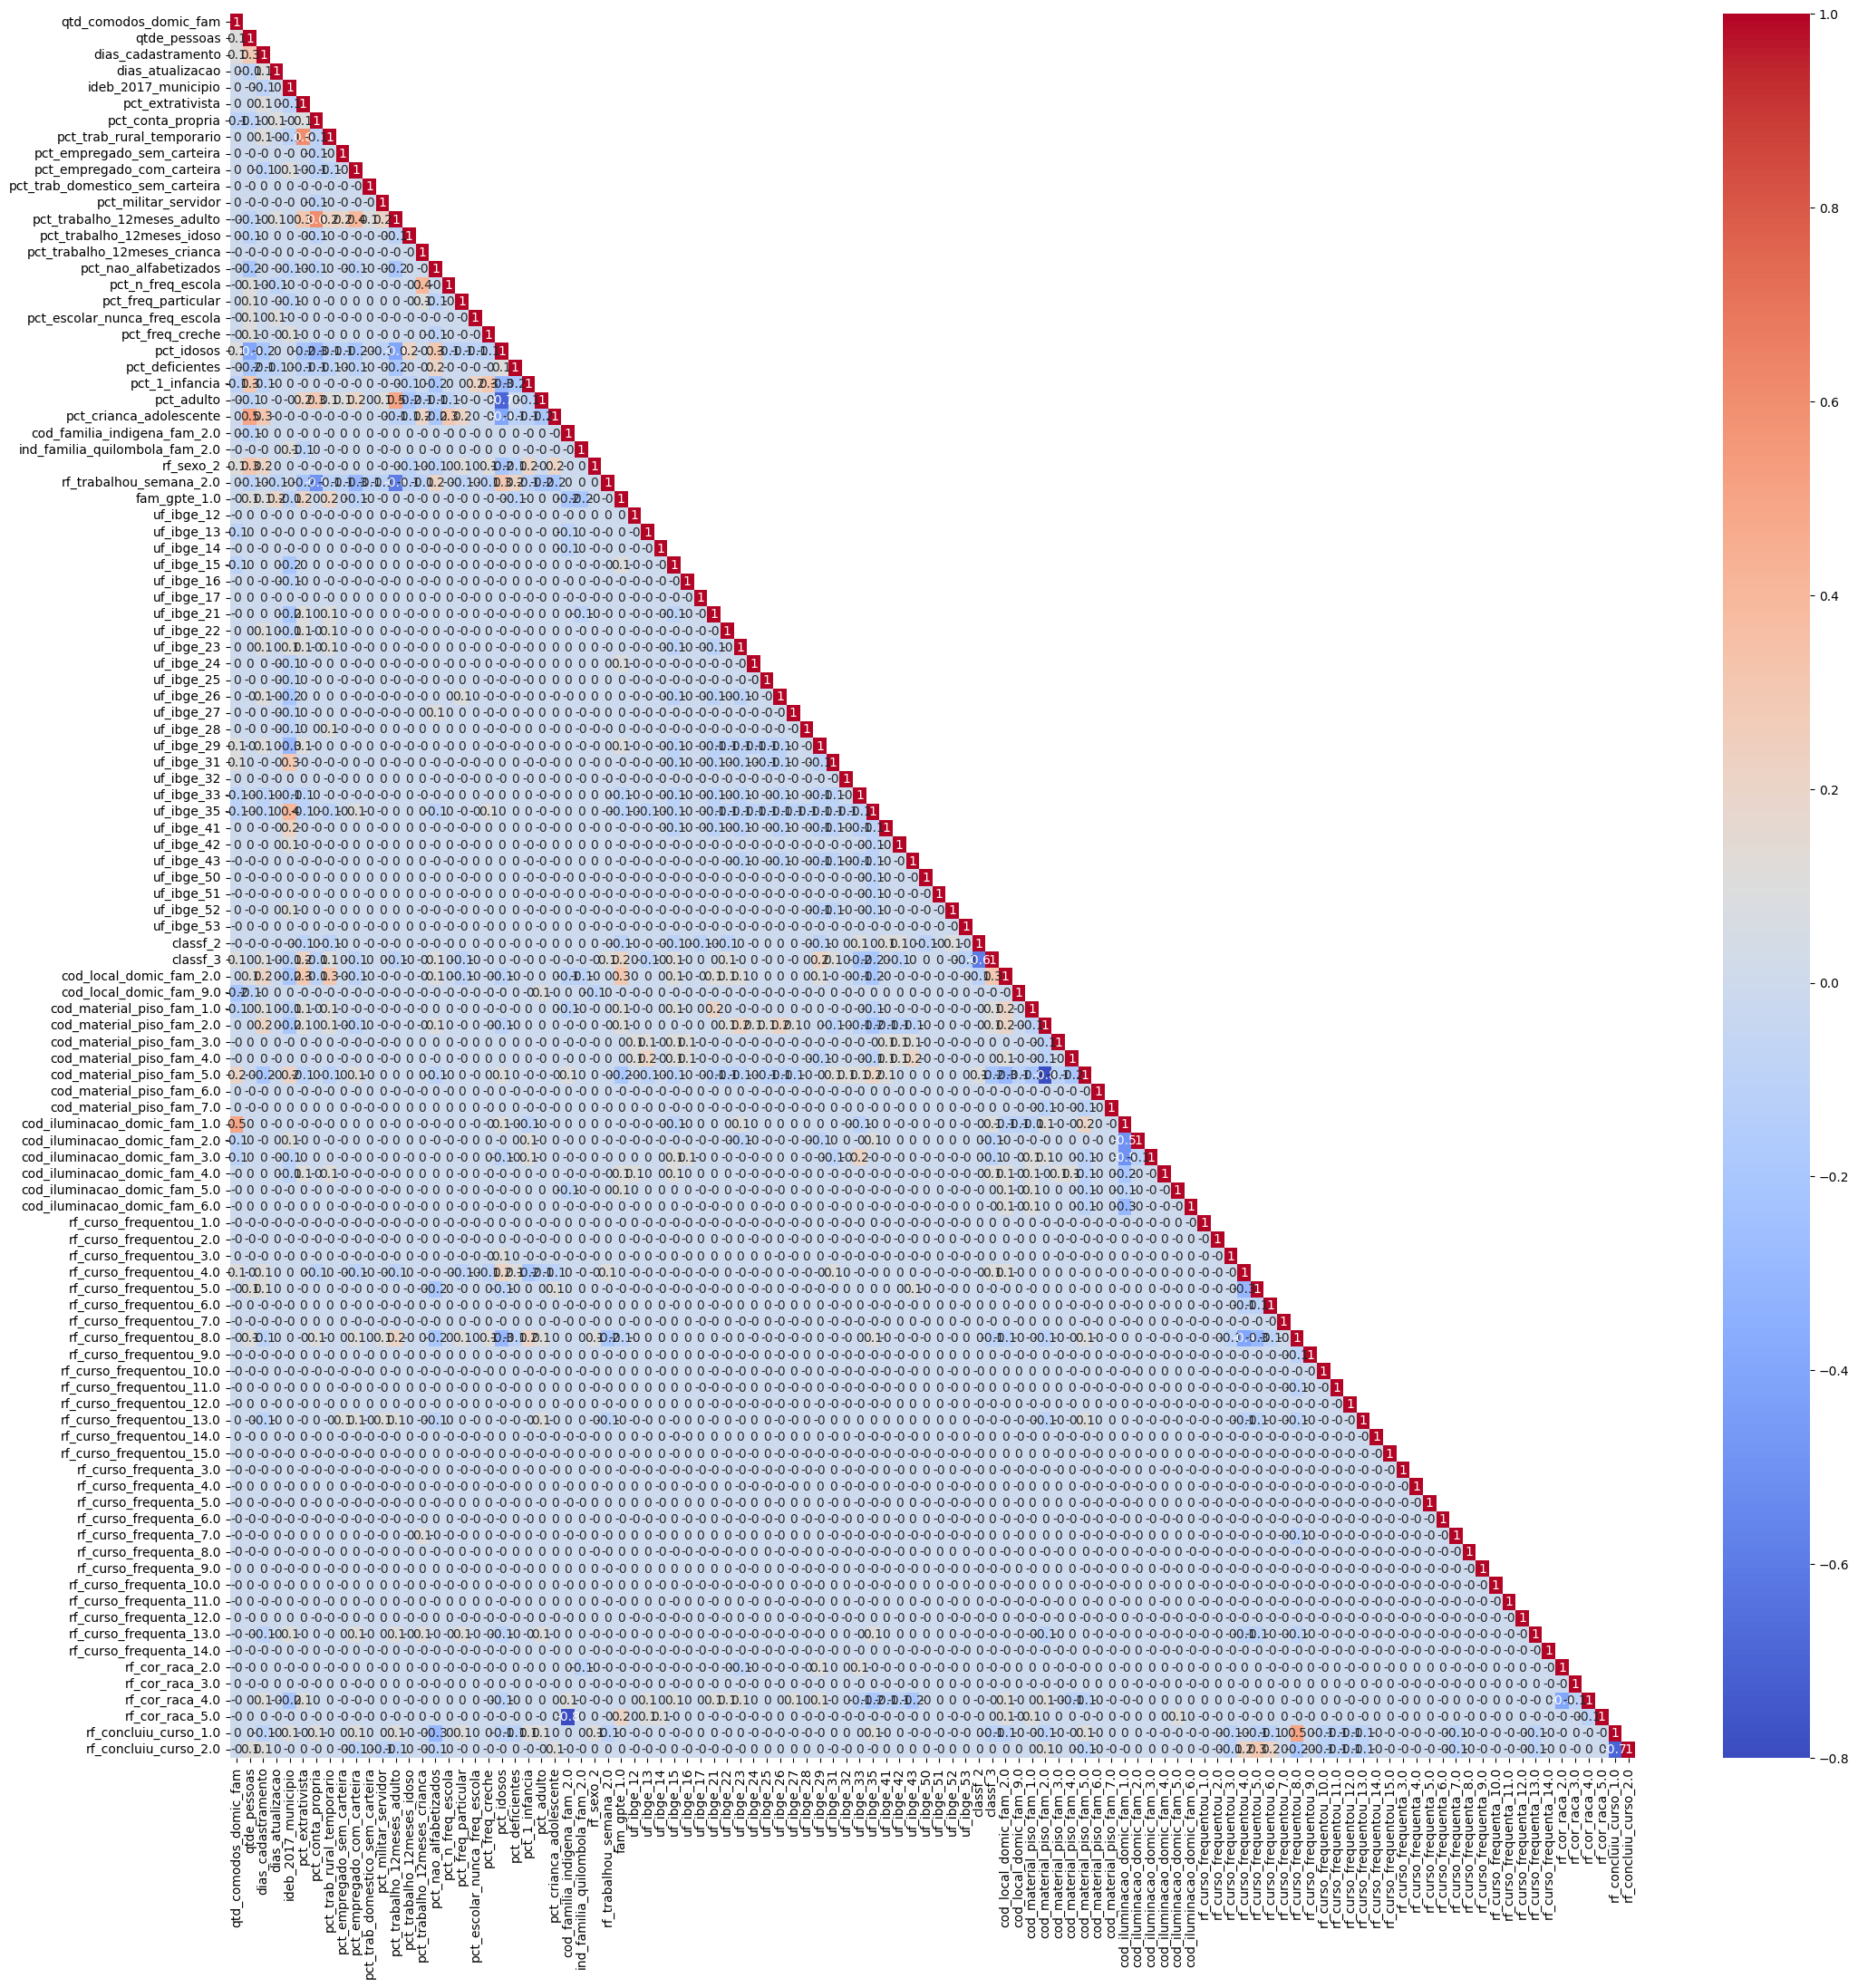

In [28]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_modelo[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria',
                         'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
                         'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 
                         'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 
                         'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 
                         'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27',
                         'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51',
                         'uf_ibge_52', 'uf_ibge_53', 'classf_2', 'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0',
                         'cod_material_piso_fam_3.0', 'cod_material_piso_fam_4.0', 'cod_material_piso_fam_5.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0',
                         'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0', 'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0',
                         'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0', 'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0',
                         'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0', 'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0',
                         'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0', 'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_3.0', 
                         'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0',
                         'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0', 'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0',
                         'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_cor_raca_5.0', 'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0']]



mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [29]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.75
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: cod_familia_indigena_fam_2.0 e rf_cor_raca_5.0, Correlação: 0.80
Colunas: cod_material_piso_fam_2.0 e cod_material_piso_fam_5.0, Correlação: 0.77


In [30]:
df_modelo = df_modelo.drop(columns=['rf_cor_raca_5.0', 'cod_material_piso_fam_5.0'])

In [31]:
print(df_modelo.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_3

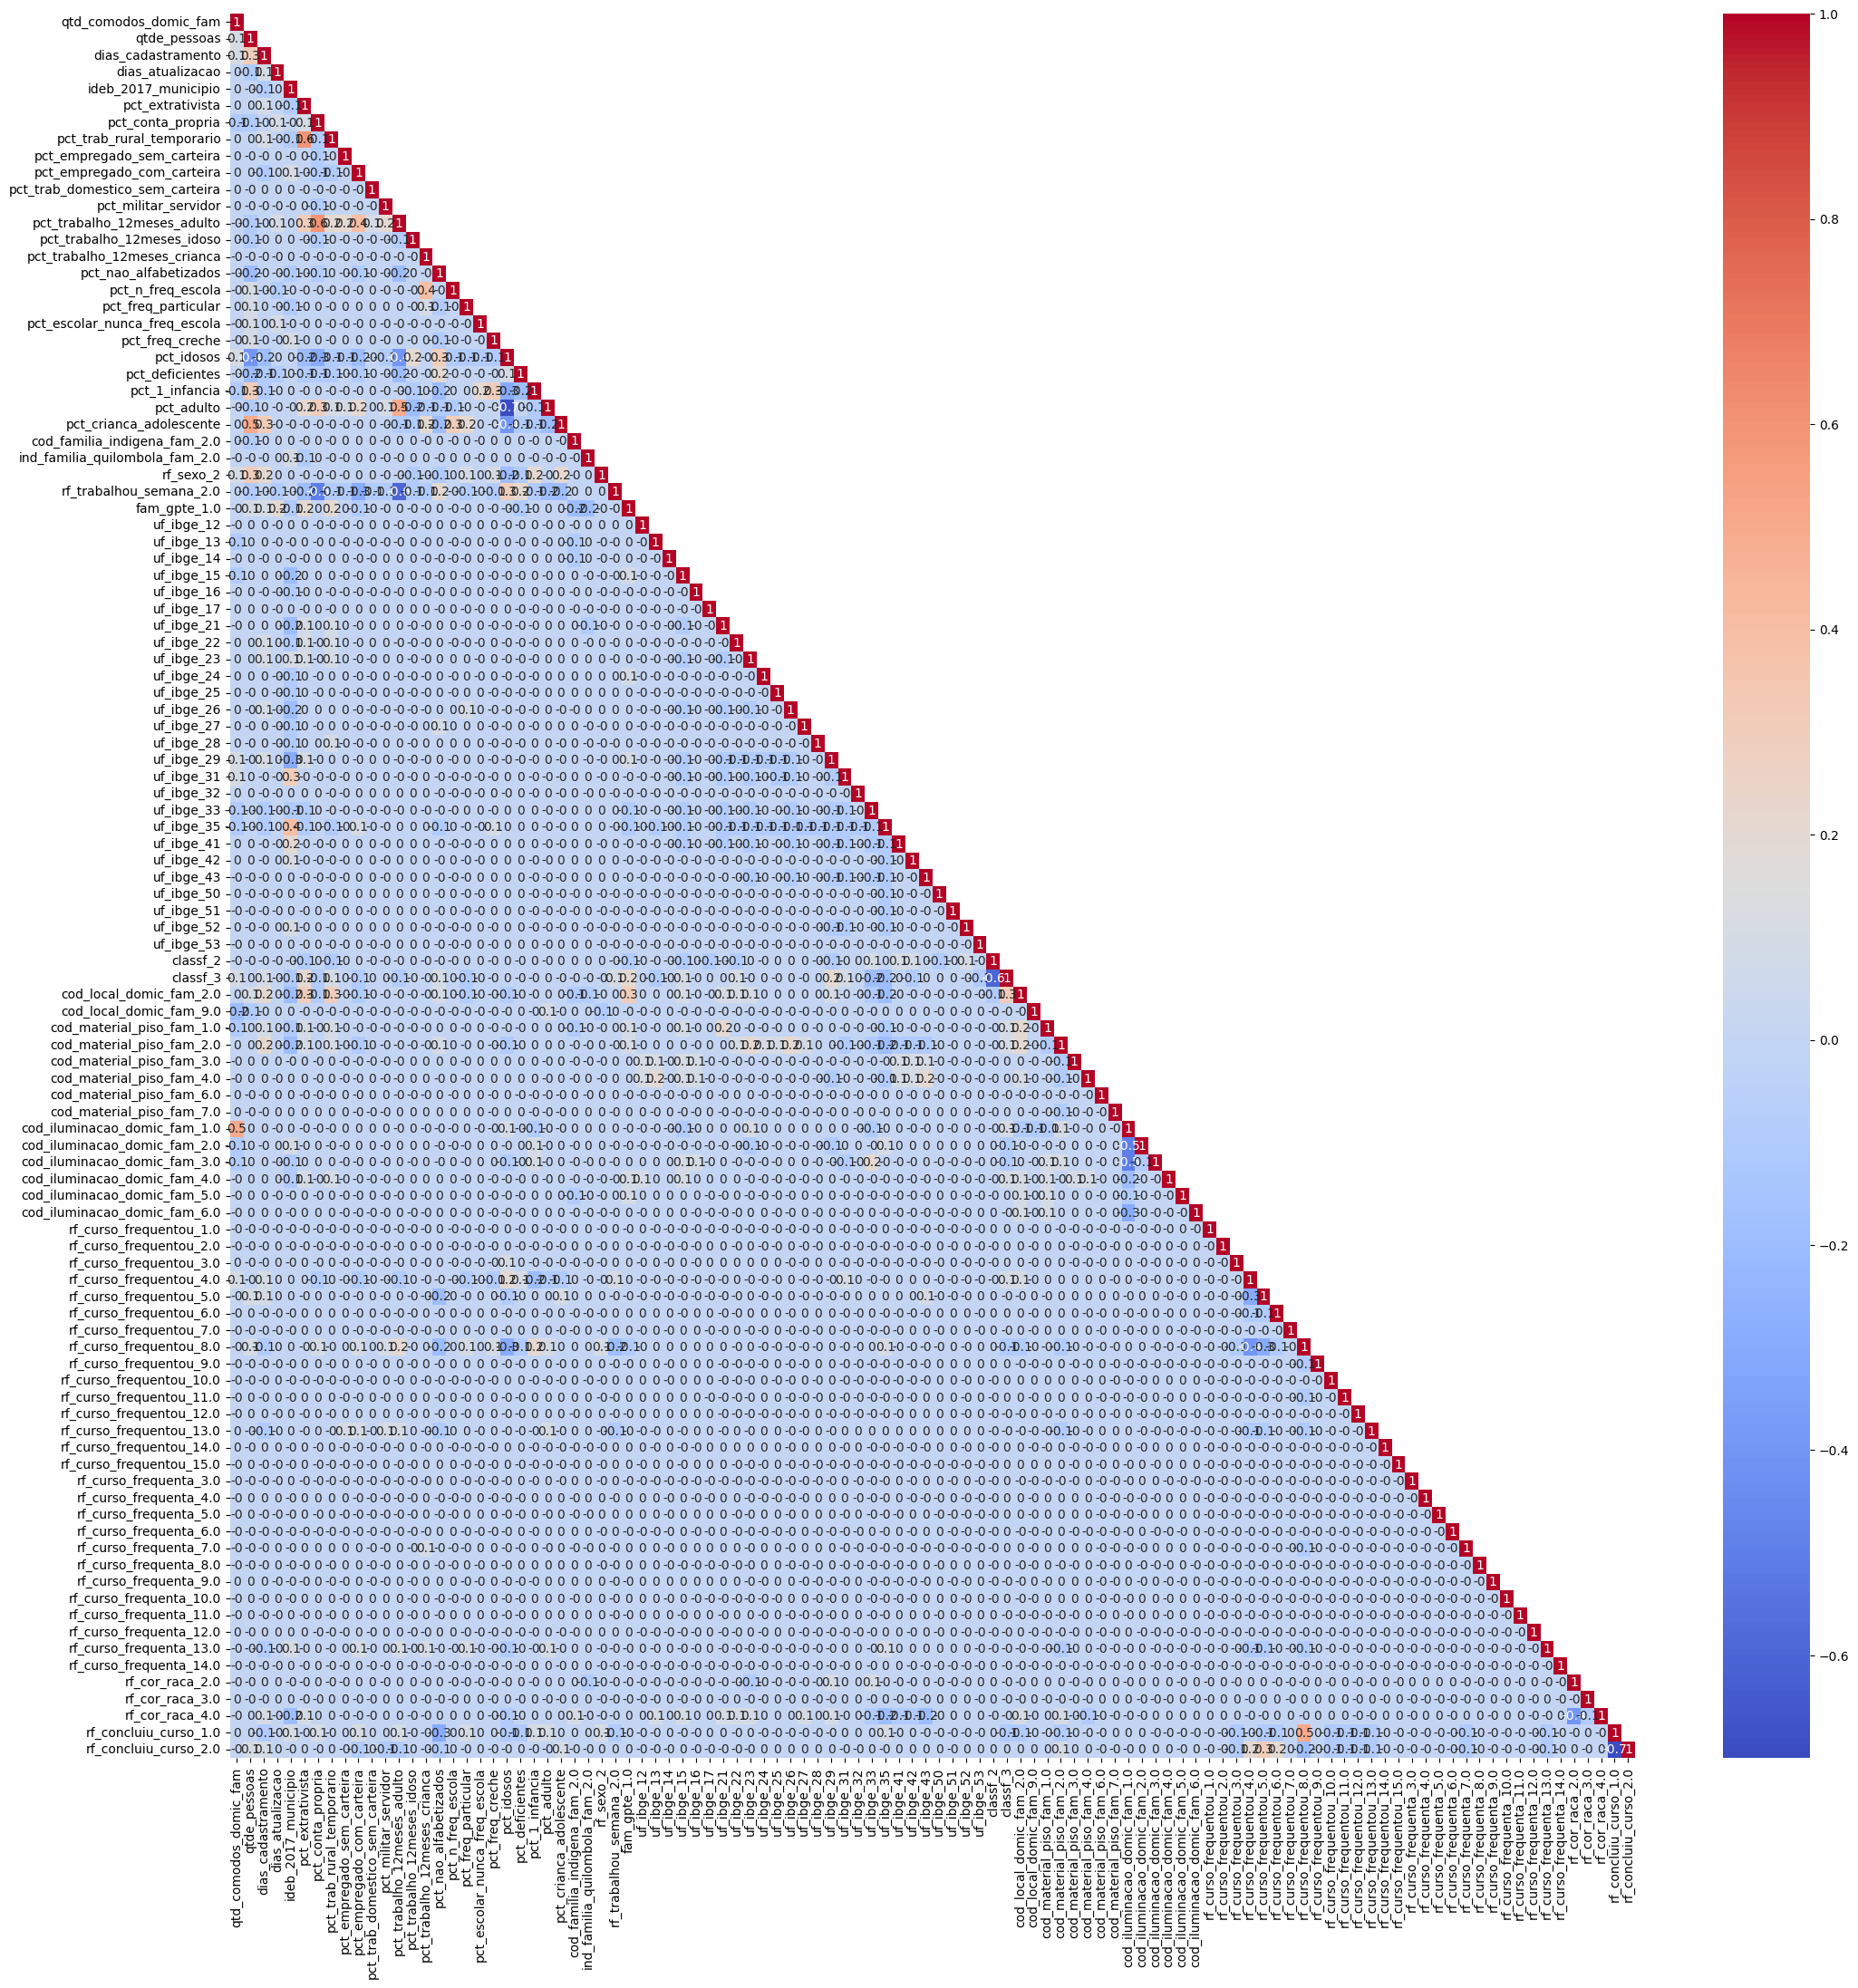

In [33]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_modelo[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria',
                         'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
                         'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
                         'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente',
                         'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14',
                         'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29',
                         'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classf_2',
                         'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0',
                         'cod_material_piso_fam_4.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0', 'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0',
                         'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0',
                         'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0',
                         'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0',
                         'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0',
                         'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0',
                         'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_concluiu_curso_1.0',
                         'rf_concluiu_curso_2.0']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [34]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")

Não tem correlações altas acima do limite estabelecido.


## Criando o dataframe X e a variável target y

In [35]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_modelo[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria',
                         'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
                         'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_particular',
                         'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente',
                         'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14',
                         'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29',
                         'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43', 'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classf_2',
                         'classf_3', 'cod_local_domic_fam_2.0', 'cod_local_domic_fam_9.0', 'cod_material_piso_fam_1.0', 'cod_material_piso_fam_2.0', 'cod_material_piso_fam_3.0',
                         'cod_material_piso_fam_4.0', 'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0', 'cod_iluminacao_domic_fam_1.0', 'cod_iluminacao_domic_fam_2.0',
                         'cod_iluminacao_domic_fam_3.0', 'cod_iluminacao_domic_fam_4.0', 'cod_iluminacao_domic_fam_5.0', 'cod_iluminacao_domic_fam_6.0', 'rf_curso_frequentou_1.0',
                         'rf_curso_frequentou_2.0', 'rf_curso_frequentou_3.0', 'rf_curso_frequentou_4.0', 'rf_curso_frequentou_5.0', 'rf_curso_frequentou_6.0', 'rf_curso_frequentou_7.0',
                         'rf_curso_frequentou_8.0', 'rf_curso_frequentou_9.0', 'rf_curso_frequentou_10.0', 'rf_curso_frequentou_11.0', 'rf_curso_frequentou_12.0', 'rf_curso_frequentou_13.0',
                         'rf_curso_frequentou_14.0', 'rf_curso_frequentou_15.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0',
                         'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0',
                         'rf_curso_frequenta_12.0', 'rf_curso_frequenta_13.0', 'rf_curso_frequenta_14.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_concluiu_curso_1.0',
                         'rf_concluiu_curso_2.0']]
y = df_modelo['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 104)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,cod_familia_indigena_fam_2.0,ind_familia_quilombola_fam_2.0,rf_sexo_2,rf_trabalhou_semana_2.0,fam_gpte_1.0,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_2,classf_3,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,rf_curso_frequentou_1.0,rf_curso_frequentou_2.0,rf_curso_frequentou_3.0,rf_curso_frequentou_4.0,rf_curso_frequentou_5.0,rf_curso_frequentou_6.0,rf_curso_frequentou_7.0,rf_curso_frequentou_8.0,rf_curso_frequentou_9.0,rf_curso_frequentou_10.0,rf_curso_frequentou_11.0,rf_curso_frequentou_12.0,rf_curso_frequentou_13.0,rf_curso_frequentou_14.0,rf_curso_frequentou_15.0,rf_curso_frequenta_3.0,rf_curso_frequenta_4.0,rf_curso_frequenta_5.0,rf_curso_frequenta_6.0,rf_curso_frequenta_7.0,rf_curso_frequenta_8.0,rf_curso_frequenta_9.0,rf_curso_frequenta_10.0,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0
0,-0.172835,-1.081453,0.155193,0.199272,-0.116065,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.00,0.000000,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.743239,-1.081453,-1.000676,-0.603429,0.092777,0.0,1.00,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,1.000000,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.397570,0.396923,-1.011257,-0.666093,0.092777,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.00,0.666667,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.967975,1.875299,-0.282163,-0.146874,0.092777,0.0,0.00,0.0,0.0,0.200000,0.0,0.0,0.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.400000,0.200000,0.00,0.400000,0.20,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.967975,1.136111,-1.015792,

In [36]:
# Verificar a presença de valores NaN
print(X.isnull().sum().sum())

0


In [37]:
y.tail()

96786    0
96787    1
96788    1
96789    1
96790    2
Name: classe_renda, dtype: int64

In [38]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [39]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinando o modelo

In [40]:
!pip install catboost -q

In [41]:
# Importar as bibliotecas necessárias
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Dados de entrada (X_train, y_train, X_test, y_test)

# Definir o modelo e os hiperparâmetros para o GridSearchCV
model_info = {
    'model': CatBoostClassifier(silent=True, random_state=42, train_dir='catboost_temp', loss_function='MultiClass'),
    'param_grid': {
        'classifier__iterations': [100, 300, 500],
        'classifier__depth': [5, 6, 7],
        'classifier__learning_rate': [0.1, 0.5, 1]
    }
}


# Criar o pipeline
pipeline = Pipeline([
    ('classifier', model_info['model'])
])

# Definir o GridSearchCV
grid_search = GridSearchCV(
    pipeline, 
    param_grid=model_info['param_grid'], 
    cv=3, 
    scoring='f1_macro', 
    n_jobs=-1, 
    error_score='raise'  # Para levantar o erro e identificar o problema
)

# Ajustar o GridSearchCV
grid_search.fit(X_train, y_train)

# Armazenar o melhor modelo
best_model_balanceado = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Separar os dados em folds para a validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar o modelo com validação cruzada
scores = cross_val_score(best_model_balanceado, X_train, y_train, cv=skf, scoring='accuracy')
print("Scores de validação cruzada:", scores)
print("Acurácia média:", scores.mean())

# Ajustar o melhor modelo encontrado nos dados de treino completos
best_model_balanceado.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = best_model_balanceado.predict(X_test)

# Avaliar o modelo
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))



Melhores hiperparâmetros: {'classifier__depth': 6, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}
Scores de validação cruzada: [0.74959644 0.74733648 0.74628697 0.74208963 0.74790133]
Acurácia média: 0.746642167985129
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6418
           1       0.68      0.65      0.66      6383
           2       0.79      0.79      0.79      6558

    accuracy                           0.75     19359
   macro avg       0.75      0.75      0.75     19359
weighted avg       0.75      0.75      0.75     19359

Acurácia: 0.7494188749418875


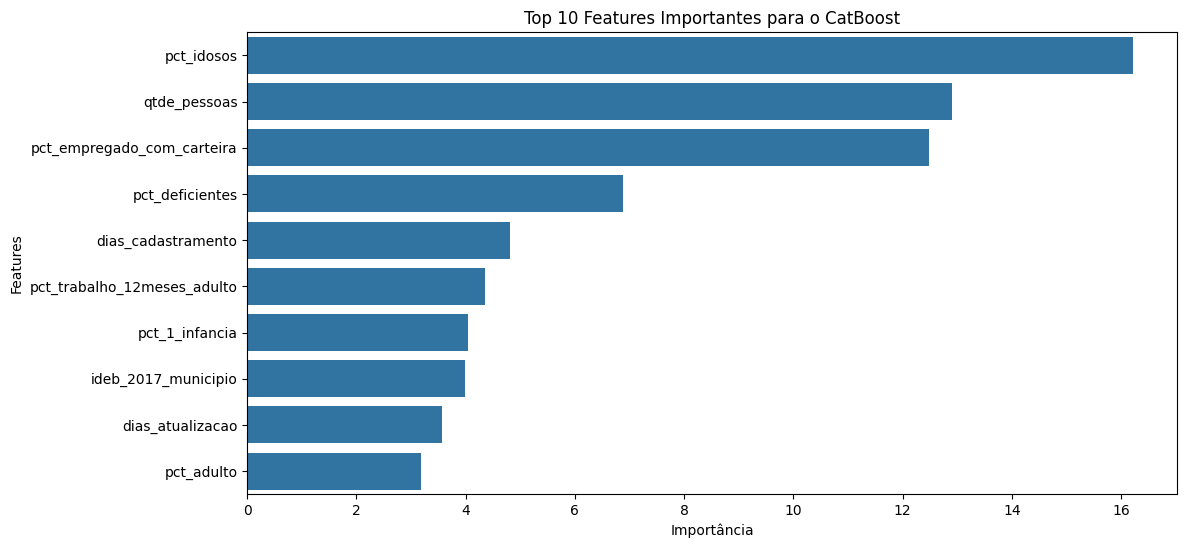

In [42]:
# Visualizar as features mais importantes
feature_importances = best_model_balanceado.named_steps['classifier'].get_feature_importance()
features = X_train.columns

# Criar um DataFrame para as importâncias
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), legend=False)  # Remover o parâmetro palette
plt.title('Top 10 Features Importantes para o CatBoost')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

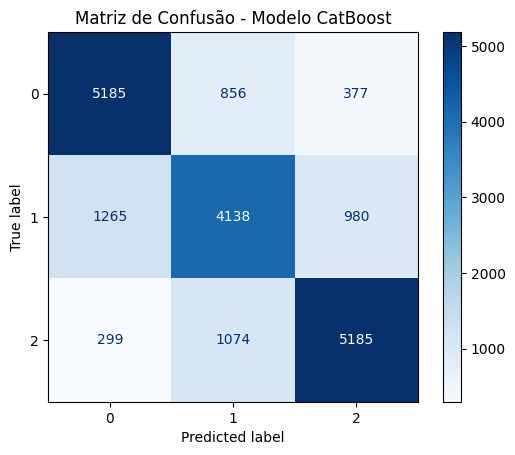

In [44]:
# Fazer previsões nos dados de teste
y_pred = best_model_balanceado.predict(X_test)

# Gerar e exibir a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusão - Modelo CatBoost')
plt.grid(False)  # Remove a grade para melhorar a visualização
plt.show()


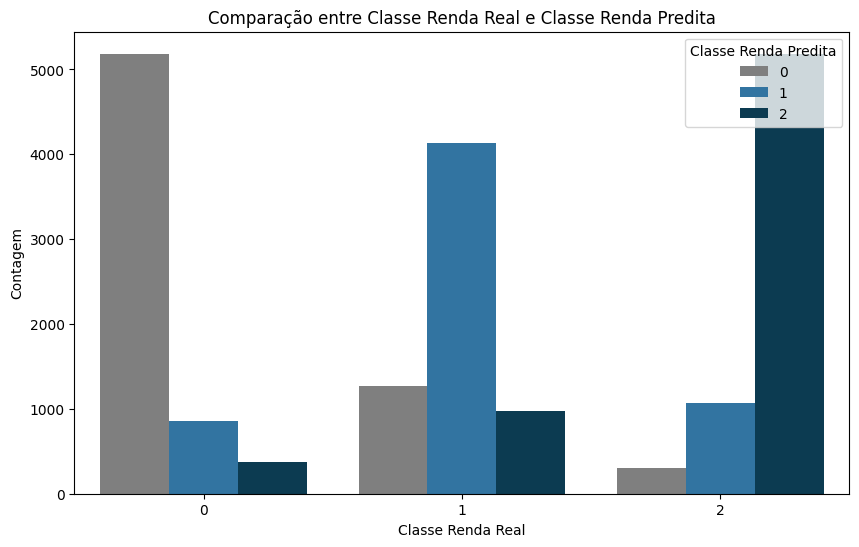

In [45]:
# Adiciona as previsões ao dataframe de teste para comparação
df_test = X_test.copy()
df_test['classe_renda_real'] = y_test
df_test['classe_renda_predita'] = y_pred

# Criar uma paleta de azul e cinza
custom_palette = ['#7f7f7f', '#1f77b4', '#003f5c']  # Classe 0 com azul escuro, classe 1 em cinza, classe 2 em verde.

# Criar um gráfico de barras para comparar as classes reais e preditas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='classe_renda_real', hue='classe_renda_predita', palette=custom_palette)
plt.title("Comparação entre Classe Renda Real e Classe Renda Predita")
plt.xlabel("Classe Renda Real")
plt.ylabel("Contagem")
plt.legend(title="Classe Renda Predita", loc='upper right')
plt.show()


## Avaliando a curva ROC

Resultados do Modelo:
         Classe  Precision    Recall  F1-Score  Support       AUC
0             0   0.768262  0.807884  0.787575   6418.0  0.919914
1             1   0.681938  0.648285  0.664686   6383.0  0.846680
2             2   0.792571  0.790637  0.791603   6558.0  0.930043
3     Macro avg   0.747590  0.748935  0.747955  19359.0       NaN
4  Weighted avg   0.748034  0.749419  0.748421  19359.0       NaN
5   Overall AUC        NaN       NaN       NaN      NaN  0.898879

Resumo Geral do Modelo:
Acurácia: 0.7494
Macro Recall: 0.7489
Macro F1-Score: 0.7480
Overall AUC: 0.8989


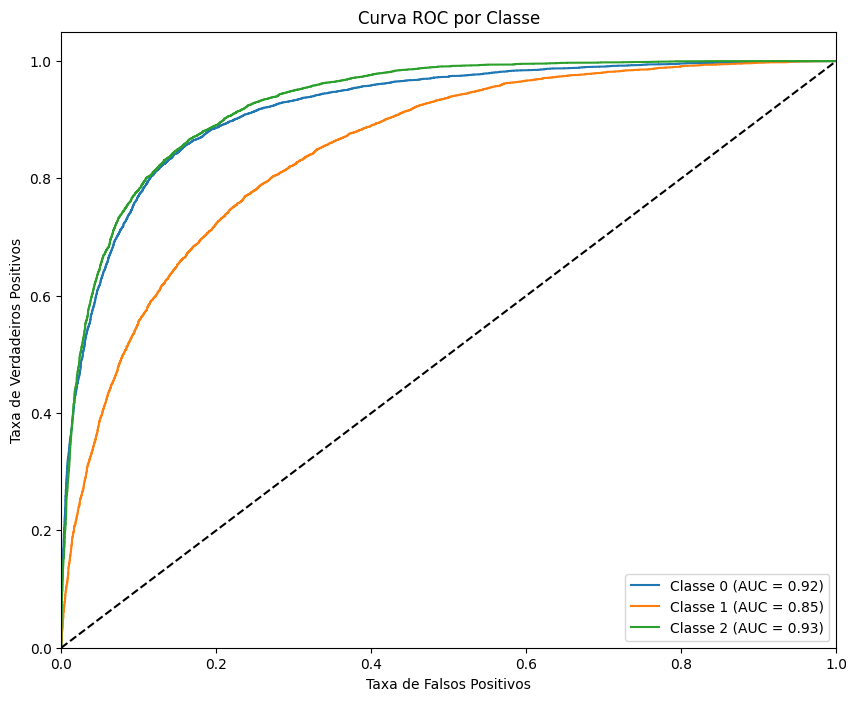

In [46]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Avaliar o modelo
y_pred = best_model_balanceado.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Relatório de classificação
report = classification_report(y_test, y_pred, output_dict=True)

# Binarizar y_test e obter as probabilidades de predição
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_scores = best_model_balanceado.predict_proba(X_test)

# Calcular AUC para cada classe
auc_scores = [
    roc_auc_score(y_test_bin[:, i], y_scores[:, i]) if np.any(y_test_bin[:, i]) else np.nan
    for i in range(y_test_bin.shape[1])
]

# Calcular AUC geral
auc_overall = roc_auc_score(y_test_bin, y_scores, multi_class='ovr')

# Criar DataFrame para armazenar os resultados
results_df = pd.DataFrame({
    'Classe': [0, 1, 2],
    'Precision': [report[str(i)]['precision'] for i in range(3)],
    'Recall': [report[str(i)]['recall'] for i in range(3)],
    'F1-Score': [report[str(i)]['f1-score'] for i in range(3)],
    'Support': [report[str(i)]['support'] for i in range(3)],
    'AUC': auc_scores
})

# Adicionar métricas médias
for avg_type in ['macro avg', 'weighted avg']:
    results_df.loc[len(results_df)] = {
        'Classe': avg_type.capitalize(),
        'Precision': report[avg_type]['precision'],
        'Recall': report[avg_type]['recall'],
        'F1-Score': report[avg_type]['f1-score'],
        'Support': report[avg_type]['support'],
        'AUC': np.nan  # AUC não se aplica a médias
    }

# AUC geral
results_df.loc[len(results_df)] = {
    'Classe': 'Overall AUC',
    'Precision': np.nan,
    'Recall': np.nan,
    'F1-Score': np.nan,
    'Support': np.nan,
    'AUC': auc_overall
}

# Mostrar o DataFrame com os resultados
print("Resultados do Modelo:")
print(results_df)

# Resumo Geral do Modelo
general_metrics = {
    'Acurácia': accuracy,
    'Macro Recall': report['macro avg']['recall'],
    'Macro F1-Score': report['macro avg']['f1-score'],
    'Overall AUC': auc_overall
}

# Exibir as métricas gerais
print("\nResumo Geral do Modelo:")
for metric, value in general_metrics.items():
    print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    if not np.isnan(auc_scores[i]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {auc_scores[i]:.2f})')

# Configurações do gráfico
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC por Classe')
plt.legend(loc='lower right')
plt.show()


Resultados do Modelo (com AUC):
             precision    recall  f1-score       AUC
0             0.768262  0.807884  0.787575  0.919914
1             0.681938  0.648285  0.664686  0.846680
2             0.792571  0.790637  0.791603  0.930043
Overall AUC        NaN       NaN       NaN  0.898879


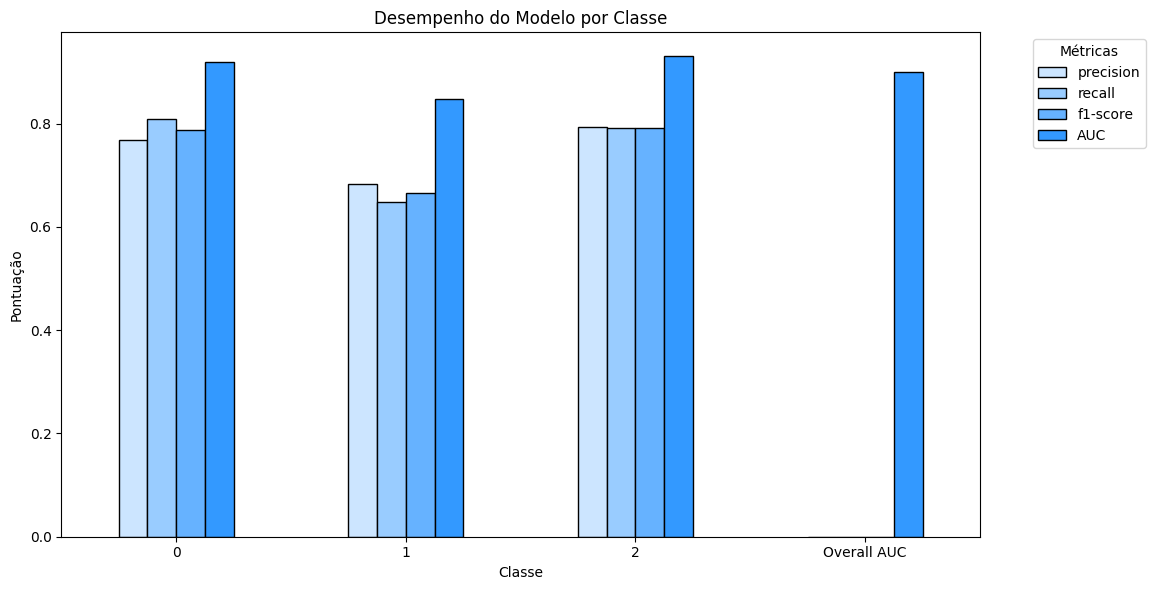

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

# Obter o relatório de classificação como um dicionário
report = classification_report(y_test, y_pred, output_dict=True)

# Converter o relatório em um DataFrame
report_df = pd.DataFrame(report).transpose()

# Calcular AUC para cada classe
auc_scores = roc_auc_score(pd.get_dummies(y_test), y_scores, multi_class='ovr', average=None)

# Adicionar AUC ao DataFrame para as classes 0, 1 e 2
report_df['AUC'] = np.nan
report_df['AUC'][:len(auc_scores)] = auc_scores

# Adicionar Overall AUC ao DataFrame
overall_auc = roc_auc_score(pd.get_dummies(y_test), y_scores, multi_class='ovr')
report_df.loc['Overall AUC'] = {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': np.nan, 'AUC': overall_auc}

# Filtrar para exibir apenas as classes presentes e as métricas relevantes
metrics_to_display = ['precision', 'recall', 'f1-score', 'AUC']
report_df = report_df.loc[[str(i) for i in range(3)] + ['Overall AUC'], metrics_to_display]

# Mostrar o DataFrame com os resultados
print("Resultados do Modelo (com AUC):")
print(report_df)

# Definir cores para o gráfico
colors = ['#cce5ff', '#99ccff', '#66b2ff', '#3399ff']

# Plotar o gráfico de barras com os resultados
report_df.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')
plt.title('Desempenho do Modelo por Classe')
plt.ylabel('Pontuação')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [48]:
report_df.head()

,precision,recall,f1-score,AUC
0,0.768262,0.807884,0.787575,0.919914
1,0.681938,0.648285,0.664686,0.846680
2,0.792571,0.790637,0.791603,0.930043
Overall AUC,NaN,NaN,NaN,0.898879


In [49]:
import joblib

In [50]:
# Salvar o Modelo CatBoost
joblib.dump(best_model_balanceado, 'CatBoostClassifier_balanceado.pkl')  # Salvar o modelo ajustado
print("Modelo pipeline balancado (CatBoostClassifier) salvo como 'CatBoostClassifier_balanceado.pkl'")

Modelo pipeline balancado (CatBoostClassifier) salvo como 'CatBoostClassifier_balanceado.pkl'
